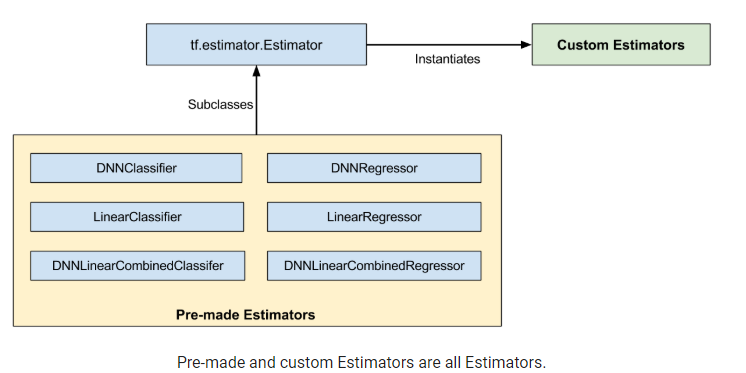

In [2]:
from IPython.display import clear_output, Image, display, HTML
Image('../etc/tf_estimators/estimator_class.PNG')

## import required packages

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## load the data

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('../MNIST_data/', one_hot=True)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
mnist.train.cls = np.argmax(mnist.train.labels, axis=1)
mnist.train.cls

array([7, 3, 4, ..., 5, 6, 8], dtype=int64)

In [7]:
mnist.test.cls = np.argmax(mnist.test.labels, axis=1)

In [8]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

## define training input function

In [9]:
#define train input_function
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": np.array(mnist.train.images)},
    y=np.array(mnist.train.cls),
    num_epochs=None,
    shuffle=True)


In [10]:
train_input_fn()

({'x': <tf.Tensor 'random_shuffle_queue_DequeueMany:1' shape=(128, 784) dtype=float32>},
 <tf.Tensor 'random_shuffle_queue_DequeueMany:2' shape=(128,) dtype=int64>)

## Premade/ Canned Estimator defining

In [11]:
feature_x = tf.feature_column.numeric_column("x", shape=img_shape)

In [12]:
feature_columns = [feature_x]

In [13]:
num_hidden_units = [512, 256, 128]

In [14]:
model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                   hidden_units=num_hidden_units,
                                   activation_fn=tf.nn.relu,
                                   n_classes=num_classes,
                                   model_dir="../saved_models/checkpoints_cannedEstimator1/")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '../saved_models/checkpoints_cannedEstimator1/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002009476FC50>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## train the model

In [16]:
model.train(
    input_fn= train_input_fn, steps=2000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ../saved_models/checkpoints_cannedEstimator1/model.ckpt.
INFO:tensorflow:loss = 297.416, step = 1
INFO:tensorflow:global_step/sec: 59.506
INFO:tensorflow:loss = 27.9162, step = 101 (1.684 sec)
INFO:tensorflow:global_step/sec: 60.3501
INFO:tensorflow:loss = 24.8523, step = 201 (1.658 sec)
INFO:tensorflow:global_step/sec: 58.651
INFO:tensorflow:loss = 23.9881, step = 301 (1.705 sec)
INFO:tensorflow:global_step/sec: 58.2582
INFO:tensorflow:loss = 9.33239, step = 401 (1.716 sec)
INFO:tensorflow:global_step/sec: 60.2954
INFO:tensorflow:loss = 21.4601, step = 501 (1.660 sec)
INFO:tensorflow:global_step/sec: 60.9385
INFO:tensorflow:loss = 19.703, step = 601 (1.639 sec)
INFO:tensorflow:global_step/sec: 60.606
INFO:tensorflow:loss = 20.2559, step = 701 (1.651 sec)
INFO:tensorflow:global_step/sec: 59.9162
INFO:tensorflow:loss = 12.2411, step = 801 (1.667 sec)
INFO:tensorflow:global_step/sec: 61.4628
INFO:te

## evaluate the model

In [17]:

test_input_fn  = tf.estimator.inputs.numpy_input_fn(
    x={"x": np.array(mnist.test.images)},
    y=np.array(mnist.test.cls),
    num_epochs=1,
    shuffle=False)

In [18]:
result = model.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Starting evaluation at 2018-06-03-10:31:54
INFO:tensorflow:Restoring parameters from ../saved_models/checkpoints_cannedEstimator1/model.ckpt-2000
INFO:tensorflow:Finished evaluation at 2018-06-03-10:31:56
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9695, average_loss = 0.0999823, global_step = 2000, loss = 12.656


In [19]:
result

{'accuracy': 0.96950001,
 'average_loss': 0.099982329,
 'global_step': 2000,
 'loss': 12.655992}

In [20]:
print("Classification accuracy: {0:.2%}".format(result["accuracy"]))

Classification accuracy: 96.95%


## make predictions

In [21]:
some_images = mnist.test.images[0:9]
expected = np.argmax(mnist.test.labels[0:9], axis=1)
expected

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=int64)

In [22]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": some_images},
    num_epochs=1,
    shuffle=False)

In [23]:
predictions = model.predict(input_fn=predict_input_fn)

In [24]:
cls_pred = np.array(list(predictions))

INFO:tensorflow:Restoring parameters from ../saved_models/checkpoints_cannedEstimator1/model.ckpt-2000


In [27]:
template = ('\nPrediction is "{}" ({:.1f}%), expected "{}"')

for pred_dict, expec in zip(cls_pred, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print(template.format(class_id,100 * probability, expec))


Prediction is "7" (100.0%), expected "7"

Prediction is "2" (99.9%), expected "2"

Prediction is "1" (100.0%), expected "1"

Prediction is "0" (100.0%), expected "0"

Prediction is "4" (99.9%), expected "4"

Prediction is "1" (100.0%), expected "1"

Prediction is "4" (100.0%), expected "4"

Prediction is "9" (98.0%), expected "9"

Prediction is "5" (99.1%), expected "5"
